# Red Wine Quality Prediction

In [82]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV 

In [7]:
#loading the dataset to a Pandas Dataframe
data= pd.read_csv("Red-winequality.csv")

In [8]:
#nos. of rows and columns in the dataset
data.shape

(1599, 12)

In [9]:
data #displays the dataset contents

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
#checking for missing data if any
data.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
#checking the values for the statistical measures of thr dataset(count,mean,std deviation,min,max and etc)
data.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data Visualization

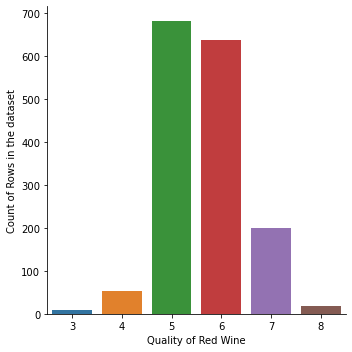

In [12]:
 #checking the various categories of red wine quality
sns.catplot(x='quality',data=data,kind='count')
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

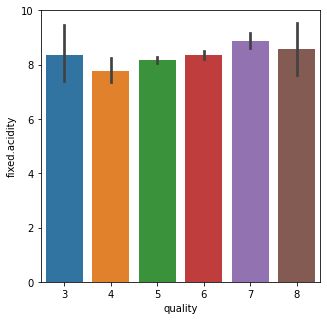

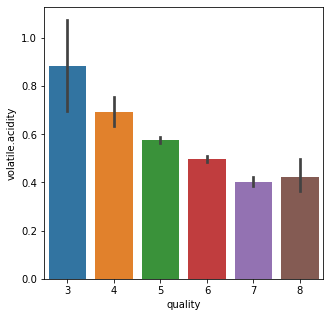

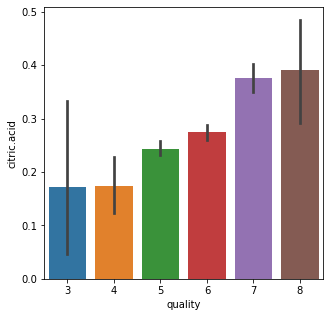

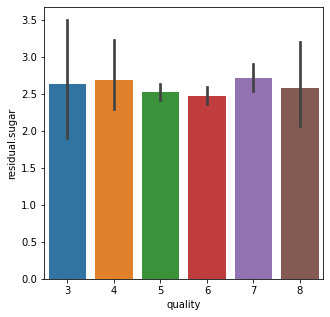

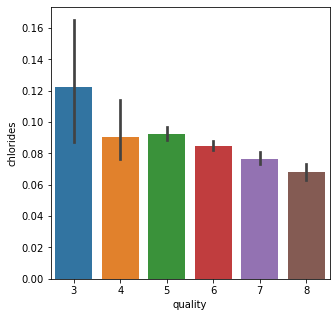

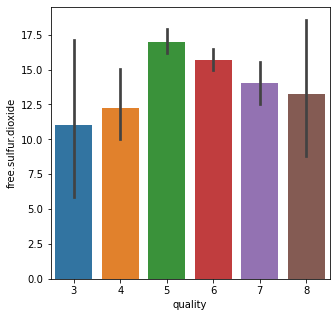

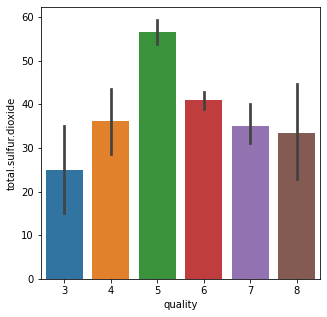

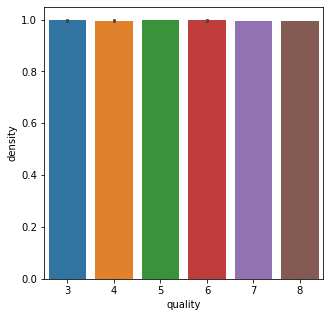

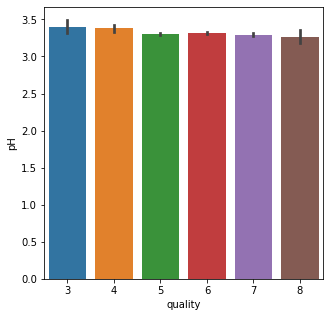

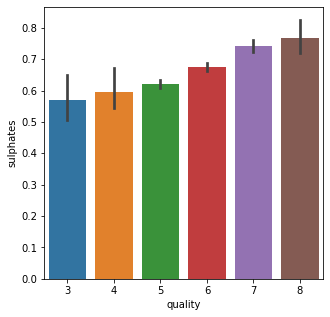

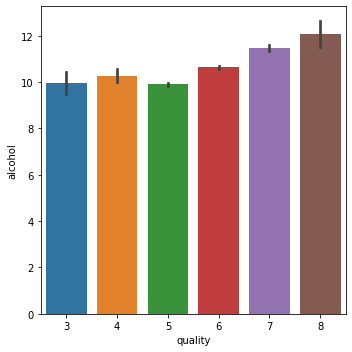

In [13]:
#comparing the data of features and Quality and its impact on it.
index=0
labels = data['quality']
features = data.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(5,5))
    sns.barplot(x=labels, y=col[index], data=data)
plt.tight_layout()
plt.show()

# Correalation of data

In [14]:
correlation=data.corr()

<AxesSubplot:>

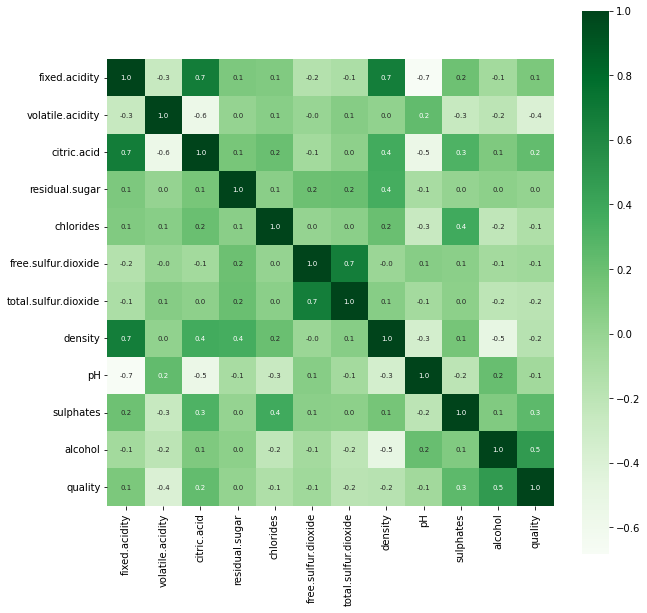

In [15]:
#constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt= '.1f', annot=True, annot_kws={'size':7}, cmap='Greens')


# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [16]:
X = data.drop('quality', axis=1)
X

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [17]:
Y= data['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)
Y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [30]:
# Checking skewness
X.skew().sort_values(ascending=False)

chlorides               5.680347
residual.sugar          4.540655
sulphates               2.428672
total.sulfur.dioxide    1.515531
free.sulfur.dioxide     1.250567
fixed.acidity           0.982751
alcohol                 0.860829
volatile.acidity        0.671593
citric.acid             0.318337
pH                      0.193683
density                 0.071288
dtype: float64

In [32]:
from sklearn.preprocessing import power_transform
wine_x=power_transform(X)
wine_x

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         1.27568965e+00, -5.81649810e-01, -1.07502528e+00],
       [-1.61307687e-01,  1.77129873e+00, -1.53110932e+00, ...,
        -7.09517433e-01,  3.95139954e-01, -5.00859824e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
        -3.10054073e-01,  1.83771552e-01, -5.00859824e-01],
       ...,
       [-1.36436736e+00,  3.87065014e-04, -6.83293826e-01, ...,
         7.18868617e-01,  8.20841495e-01,  7.34557283e-01],
       [-1.76745837e+00,  7.28552770e-01, -7.43826364e-01, ...,
         1.63859528e+00,  5.88343819e-01, -1.88002120e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         5.29831617e-01,  2.56369273e-01,  7.34557283e-01]])

In [34]:
#removing the skewness using power transformation.
pd.DataFrame(wine_x,columns=X.columns).skew().sort_values(ascending=False)

alcohol                 0.112373
citric.acid             0.017788
sulphates               0.009985
volatile.acidity        0.003099
fixed.acidity           0.002529
pH                     -0.002823
total.sulfur.dioxide   -0.003752
density                -0.005054
free.sulfur.dioxide    -0.009948
residual.sugar         -0.015715
chlorides              -0.151304
dtype: float64

<AxesSubplot:>

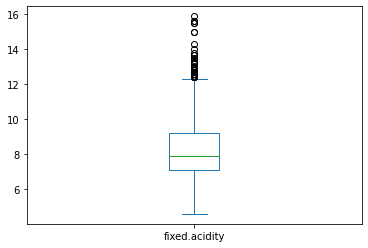

In [39]:
X['fixed.acidity'].plot.box()

<AxesSubplot:>

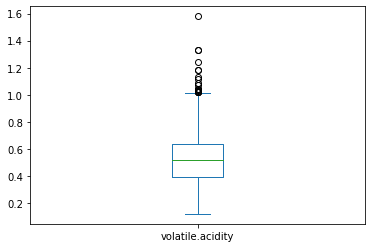

In [40]:
X['volatile.acidity'].plot.box()

<AxesSubplot:>

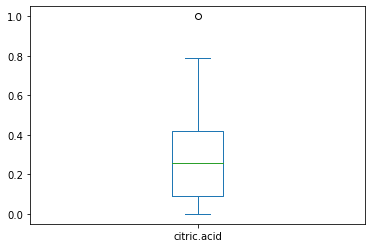

In [42]:
X['citric.acid'].plot.box()

<AxesSubplot:>

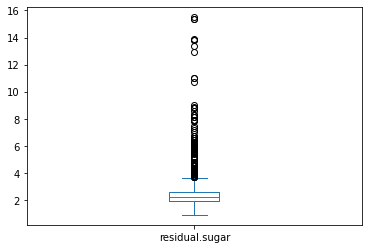

In [44]:
X['residual.sugar'].plot.box()

<AxesSubplot:>

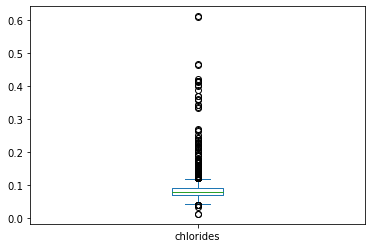

In [45]:
X['chlorides'].plot.box()

<AxesSubplot:>

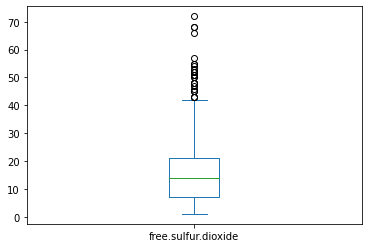

In [47]:
X['free.sulfur.dioxide'].plot.box()

<AxesSubplot:>

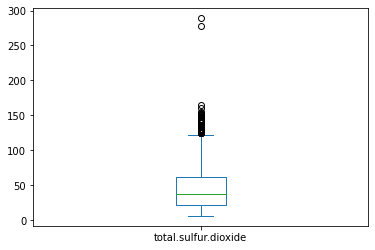

In [48]:
X['total.sulfur.dioxide'].plot.box()

<AxesSubplot:>

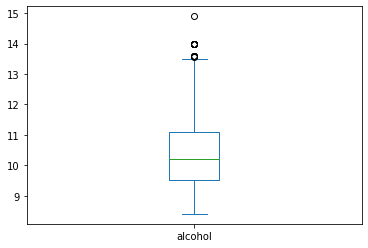

In [49]:
X['alcohol'].plot.box()

In [51]:
# Removing the outliers.
from scipy.stats import zscore
z=np.abs(zscore(X))
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [52]:
wine_df=X[(z<3).all(axis=1)]
wine_df

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [53]:
wine_df.shape

(1458, 11)

In [55]:
max_accuracy=0
max_RS=0

for i in range(1,100):
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=i)
    rf= RandomForestClassifier()
    rf.fit(X_train,Y_train)
    X_test_pred=rf.predict(X_test)
    accu=accuracy_score(Y_test, X_test_pred)
    print('Accuracy is:',accu, 'random_state', i)
    
    if accu>max_accuracy:
        max_accuracy=accu
        maxRS=i
        print('maximum_accuracy',max_accuracy,'maximum_random_state',i)

Accuracy is: 0.828125 random_state 1
maximum_accuracy 0.828125 maximum_random_state 1
Accuracy is: 0.775 random_state 2
Accuracy is: 0.8375 random_state 3
maximum_accuracy 0.8375 maximum_random_state 3
Accuracy is: 0.8375 random_state 4
Accuracy is: 0.853125 random_state 5
maximum_accuracy 0.853125 maximum_random_state 5
Accuracy is: 0.8125 random_state 6
Accuracy is: 0.846875 random_state 7
Accuracy is: 0.81875 random_state 8
Accuracy is: 0.80625 random_state 9
Accuracy is: 0.815625 random_state 10
Accuracy is: 0.784375 random_state 11
Accuracy is: 0.809375 random_state 12
Accuracy is: 0.803125 random_state 13
Accuracy is: 0.803125 random_state 14
Accuracy is: 0.796875 random_state 15
Accuracy is: 0.79375 random_state 16
Accuracy is: 0.853125 random_state 17
Accuracy is: 0.828125 random_state 18
Accuracy is: 0.8375 random_state 19
Accuracy is: 0.809375 random_state 20
Accuracy is: 0.809375 random_state 21
Accuracy is: 0.775 random_state 22
Accuracy is: 0.809375 random_state 23
Accurac

In [57]:
print('The Best Accuracy Score is:',max_accuracy,'on random state',maxRS)

The Best Accuracy Score is: 0.86875 on random state 40


In [62]:
print(confusion_matrix(Y_test,X_test_pred))
print(classification_report(Y_test,X_test_pred))

[[142  23]
 [ 32 123]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       165
           1       0.84      0.79      0.82       155

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320



In [18]:
#Creating the testing and training data set

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


# Machine Learning Model for Classification Metrics

In [64]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
     # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [83]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 73.75

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       144
           1       0.77      0.75      0.76       176

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

Cross Validation Score: 72.79604231974922

Accuracy Score - Cross Validation Score is 0.953957680250781


In [70]:
#model training
#Decision tree classifier
model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 75.9375

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72       144
           1       0.77      0.81      0.79       176

    accuracy                           0.76       320
   macro avg       0.76      0.75      0.76       320
weighted avg       0.76      0.76      0.76       320

Cross Validation Score: 63.59894200626959

Accuracy Score - Cross Validation Score is 12.338557993730412


In [71]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 82.1875

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       144
           1       0.84      0.84      0.84       176

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320

Cross Validation Score: 71.29388714733543

Accuracy Score - Cross Validation Score is 10.893612852664575


In [73]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 73.75

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71       144
           1       0.76      0.76      0.76       176

    accuracy                           0.74       320
   macro avg       0.73      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

Cross Validation Score: 63.47394200626959

Accuracy Score - Cross Validation Score is 10.276057993730412


# Hyper parameter tuning on the best ML Model

In [24]:
# Choosing Support Vector Classifier

parameters= {'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8],
            'criterion':['gini','entropy']}

In [25]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(X_train,Y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}

In [26]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [76]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt')

In [78]:
GCV_pred=GCV.best_estimator_.predict(X_test)
accuracy_score(Y_test,GCV_pred)

0.903125

# ROC AUC CURVE

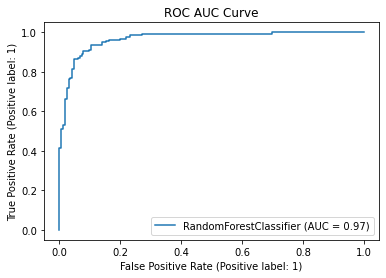

In [84]:
# ROC AUC CURVE
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,X_test,Y_test)
plt.title('ROC AUC Curve')
plt.show()

In [81]:
#Saving the model
import joblib
filename = "FinalModelRW.pkl"
joblib.dump(Final_Model, filename)

['FinalModelRW.pkl']